In [1]:
import json
import pandas as pd
from plotly import express as px
import statsmodels as sm
from sklearn.linear_model import LinearRegression
import numpy as n

# Analyze Object Proportions in Fiction

In [2]:
with open('objects-pg3.json') as f: 
    data = json.load(f)

In [3]:
# Clean filenames
data = {fn.strip('results-pg3/').strip('.txt-annotated.txt.json'): 
        vals for fn, vals in data.items()}

In [4]:
df = pd.DataFrame(data).T

In [5]:
df['year'] = df.index.str.slice(0,4).astype(int)

In [6]:
df['object_proportions'] = df[['artifact.n.01', 'living_thing.n.01', 'natural_object.n.01']].sum(axis=1)

In [16]:
def plotCategory(cat):
    fig = px.scatter(df, x='year', y=cat, trendline='ols', hover_name=df.index)
    fig.write_html(f'../includes/{cat}.html', default_height='40%', default_width='70%', 
                   full_html=False, include_plotlyjs=False)
    fig.show()

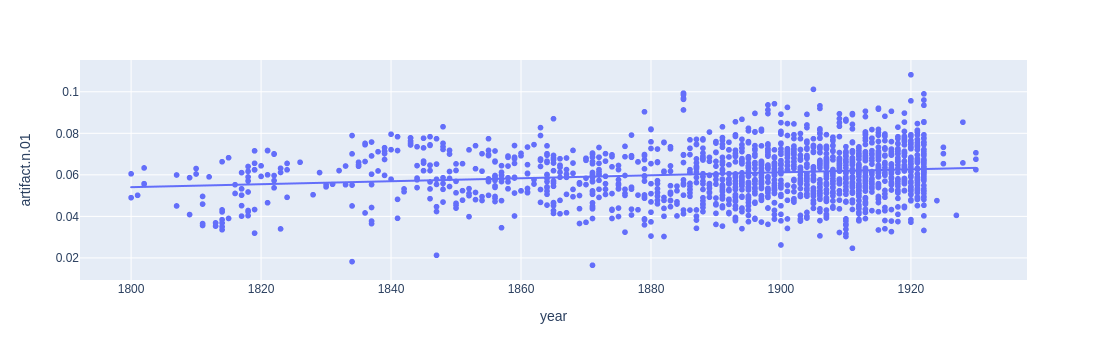

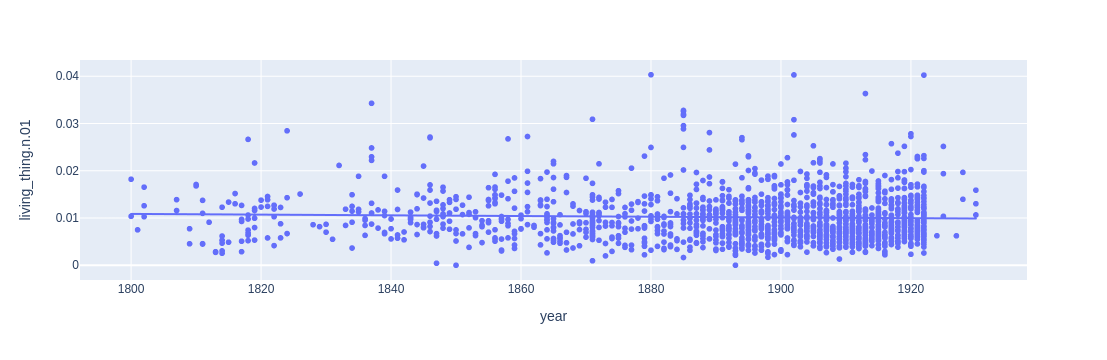

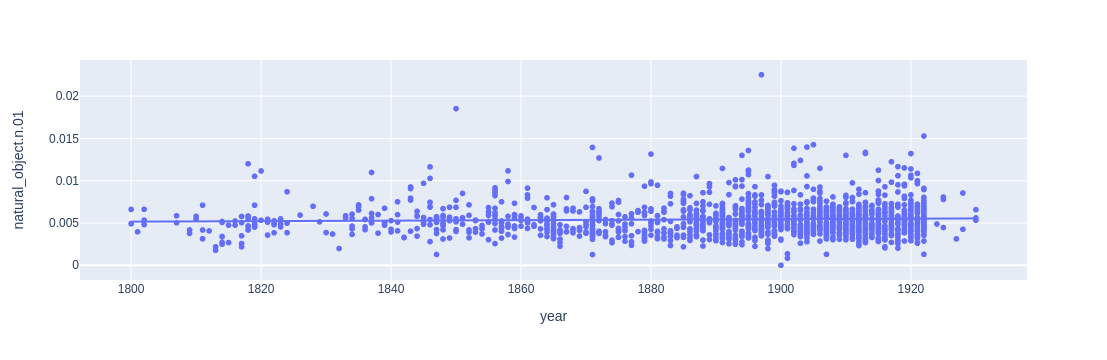

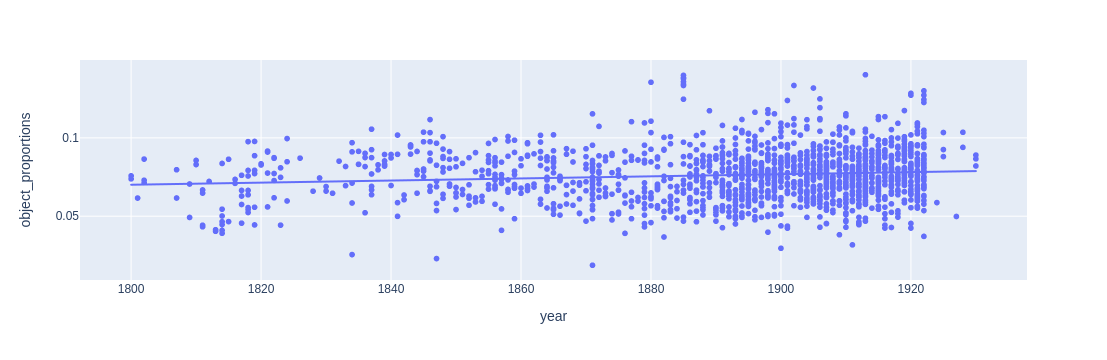

In [17]:
for cat in ['artifact.n.01', 'living_thing.n.01', 'natural_object.n.01', 'object_proportions']:
    plotCategory(cat)

## Average year of the texts in the top 20 according to proportions of objects

In [10]:
df.loc[df['object_proportions'].sort_values().tail(50).index]['year'].mean()

1900.36

## Average year of the texts in the bottom 20 according to proportions of objects

In [11]:
df.loc[df['object_proportions'].sort_values().head(50).index]['year'].mean()

1876.58

In [156]:
def increase18001920(synset, df):
    lr = LinearRegression()
    df = df[[synset, 'year']].dropna()
    lr.fit(df[['year']], df[[synset]])
    predictions = lr.predict(np.array([1800, 1920]).reshape(-1, 1))
    return (predictions[1] - predictions[0]) / predictions[0]

In [157]:
for cat in ['artifact.n.01', 'living_thing.n.01', 'natural_object.n.01', 'object_proportions']:
    print(cat, increase18001920(cat, df))

artifact.n.01 [0.15896067]
living_thing.n.01 [-0.08260843]
natural_object.n.01 [0.06780797]
object_proportions [0.11480583]


# Texts with the Most Objects

In [158]:
for cat in ['artifact.n.01', 'living_thing.n.01', 'natural_object.n.01', 'object_proportions']:
    print(df[cat].sort_values(ascending=False).head(20), end='\n\n')

1920-TheHappyForeigner-9978.0                             0.108193
1905-OswaldBastableandOthers-28804.0                      0.101146
1885-AChildsGardenofVerses-25609.0                        0.099324
1885-AChildsGardenofVerses-25608.0                        0.099306
1922-TheGardenPartyandOtherStories-1429.0                 0.098977
1885-AChildsGardenofVerses-136.0                          0.098812
1885-AChildsGardenofVerses-25611.0                        0.098481
1885-AChildsGardenofVerses-28722.0                        0.096857
1885-AChildsGardenofVerses-25610.0                        0.096723
1885-AChildsGardenofVerses-19722.0                        0.096339
1922-Ulysses-4300.0                                       0.096026
1920-BlissandOtherStories-44385.0                         0.095625
1899-TheShipofStars-16000.0                               0.094220
1898-TheDaysWorkVolume1-2569.0                            0.093673
1922-JacobsRoom-5670.0                                    0.09

In [159]:
df['living_thing.n.01'].sort_values(ascending=False).head(20)

1880-RoundAboutaGreatEstate-20528.0                       0.040316
19027-SongsofChildhood-23545.0                            0.040277
1922-DownAdownDerryABookofFairyPoems-32091.0              0.040238
1913-PeacockPieaBookofRhymes-3753.0                       0.036339
1837-TheWidowsDog-22842.0                                 0.034270
1885-AChildsGardenofVerses-25609.0                        0.032761
1885-AChildsGardenofVerses-25608.0                        0.032568
1885-AChildsGardenofVerses-25611.0                        0.031954
1885-AChildsGardenofVerses-136.0                          0.031857
1885-AChildsGardenofVerses-25610.0                        0.031712
1871-NonsenseSongs-13647.0                                0.030896
1902-JustSoStories-32488.0                                0.030809
1885-AChildsGardenofVerses-19722.0                        0.029544
1885-AChildsGardenofVerses-28722.0                        0.028851
1824-OurVillage-2496.0                                    0.02

In [160]:
df['natural_object.n.01'].sort_values(ascending=False).head(20)

1897-AnAlmanacofTwelveSports-34113.0                          0.022523
1850318-AChildsDreamofaStar-42232.0                           0.018519
1922-DownAdownDerryABookofFairyPoems-32091.0                  0.015276
1905-PoemsofWilliamBlake-574.0                                0.014258
1904320-ADarkMonthFromSwinburnesCollectedPoeticalW-18524.0    0.013971
1871-NonsenseSongs-13647.0                                    0.013925
19027-SongsofChildhood-23545.0                                0.013832
1895-RobertLouisStevensonanElegyandOtherPoems-10910.0         0.013570
1913-PeacockPieaBookofRhymes-3753.0                           0.013339
1913-TheLonelyDancerandOtherPoems-10457.0                     0.013212
1920-TheSongBookofQuongLeeofLimehouse-2161.0                  0.013201
1880-RoundAboutaGreatEstate-20528.0                           0.013146
191011-TheMahoganyTree-45921.0                                0.012987
1894-ForLoveoftheKingABurmeseMasque-23229.0                   0.012987
1872-M

In [161]:
df['artifact.n.01'].sort_values(ascending=False).head(20)

1920-TheHappyForeigner-9978.0                             0.108193
1905-OswaldBastableandOthers-28804.0                      0.101146
1885-AChildsGardenofVerses-25609.0                        0.099324
1885-AChildsGardenofVerses-25608.0                        0.099306
1922-TheGardenPartyandOtherStories-1429.0                 0.098977
1885-AChildsGardenofVerses-136.0                          0.098812
1885-AChildsGardenofVerses-25611.0                        0.098481
1885-AChildsGardenofVerses-28722.0                        0.096857
1885-AChildsGardenofVerses-25610.0                        0.096723
1885-AChildsGardenofVerses-19722.0                        0.096339
1922-Ulysses-4300.0                                       0.096026
1920-BlissandOtherStories-44385.0                         0.095625
1899-TheShipofStars-16000.0                               0.094220
1898-TheDaysWorkVolume1-2569.0                            0.093673
1922-JacobsRoom-5670.0                                    0.09

# Texts with the Fewest Objects

In [163]:
for cat in ['artifact.n.01', 'living_thing.n.01', 'natural_object.n.01', 'object_proportions']:
    print(df[cat].sort_values().head(20), end='\n\n')

1871-LadySusan-946.0                                          0.016471
18344-PhrenologicalDevelopmentofRobertBurnsFromaC-30489.0     0.018215
1847-PrefacestoFiction-14525.0                                0.021259
1911-TheFeastofStFriend-14653.0                               0.024648
1900-AChristmasSermon-14535.0                                 0.026230
1882-KeptintheDark-22000.0                                    0.030303
191011-TheMahoganyTree-45921.0                                0.030303
1880-TheKasîdahofHâjîAbdûElYezdî-6036.0                       0.030528
190611-TolstoyonShakespeareACriticalEssayonShakesp-27726.0    0.030612
191011-TheTragicComediansAStudyinaWellknownStory-4462.0       0.031582
1819-Mathilda-15238.0                                         0.031928
1909-ThePhilosophersJoke-868.0                                0.032237
1876-PercyByssheShelleyasaPhilosopherandReformer-16872.0      0.032411
1917-AFatherofWomenandOtherPoems-30669.0                      0.032658
192211